In [ ]:
# IMPORTING DATA

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df1=pd.read_excel("D:\\DOWNLOAD\DATA FILES\\takehome_users.xlsx")
df1.head()



,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
#RENAME COLUMNS

In [3]:
df1.rename(columns={"object_id":"user_id"},inplace=True)

In [4]:
#checking any duplicated value
df1.groupby("user_id")["creation_time"].count().unique()

array([1], dtype=int64)

In [5]:
df2=pd.read_excel("D:\\DOWNLOAD\\DATA FILES\\takehome_user_engagement.xlsx")
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df=pd.merge(df1,df2,on="user_id")
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


# DATA CLEANING

In [7]:
df.isna().sum()


user_id                           0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
time_stamp                        0
visited                           0
dtype: int64

In [8]:
df.rename({"time_stamp":"login_per_day"},axis=1,inplace=True)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_per_day,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


In [9]:
df.drop(["email","creation_source","name","invited_by_user_id"],axis=1,inplace=True)

In [10]:
df.isna().sum()

user_id                       0
creation_time                 0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
login_per_day                 0
visited                       0
dtype: int64

In [11]:
# ABOVE DATA HAS NO NULL VALUE

In [12]:
df[df["user_id"].duplicated()]

,user_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,login_per_day,visited
2,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-12-25 03:45:04,1
5,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-12-31 03:45:04,1
6,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2014-01-08 03:45:04,1
...,...,...,...,...,...,...,...,...
207902,11988,2014-03-15 11:04:47,1.401621e+09,0,0,114,2014-06-01 11:04:47,1
207906,11991,2014-04-20 14:22:45,1.401460e+09,0,0,388,2014-04-25 14:22:45,1
207907,11991,2014-04-20 14:22:45,1.401460e+09,0,0,388,2014-04-28 14:22:45,1
207908,11991,2014-04-20 14:22:45,1.401460e+09,0,0,388,2014-05-17 14:22:45,1


In [13]:
login=df.groupby("user_id")["visited"].sum().reset_index()
login



,user_id,visited
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1
...,...,...
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1


In [14]:
adopted=login[login["visited"]>3]
adopted

,user_id,visited
1,2,14
7,10,284
13,20,7
24,33,18
28,42,342
...,...,...
8802,11975,216
8805,11980,8
8806,11981,4
8812,11988,30


In [15]:
df["adopted_user"]=df.user_id.apply(lambda x: "YES" if x in adopted["user_id"] else "NO")

In [16]:
df.head()

,user_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,login_per_day,visited,adopted_user
0,1,2014-04-22 03:53:30,1.398139e+09,1,0,11,2014-04-22 03:53:30,1,YES
1,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-11-15 03:45:04,1,NO
2,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-11-29 03:45:04,1,NO
3,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-12-09 03:45:04,1,NO
4,2,2013-11-15 03:45:04,1.396238e+09,0,0,1,2013-12-25 03:45:04,1,NO


# Data Ready For Predict

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df["adopted_user"]=le.fit_transform(df["adopted_user"])

In [19]:
from sklearn.preprocessing import MinMaxScaler
max=MinMaxScaler()
df["creation_time"]=max.fit_transform(df[["creation_time"]])

In [20]:
df["last_session_creation_time"]=max.fit_transform(df[["last_session_creation_time"]])
df["login_per_day"]=max.fit_transform(df[["login_per_day"]])

In [21]:
df.head()

,user_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,login_per_day,visited,adopted_user
0,1,0.946796,0.938254,1,0,11,0.938254,1,1
1,2,0.730340,0.908366,0,0,1,0.723653,1,0
2,2,0.730340,0.908366,0,0,1,0.742668,1,0
3,2,0.730340,0.908366,0,0,1,0.756249,1,0
4,2,0.730340,0.908366,0,0,1,0.777980,1,0


In [22]:
df.dtypes

user_id                         int64
creation_time                 float64
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
login_per_day                 float64
visited                         int64
adopted_user                    int32
dtype: object

In [23]:
x=df.drop("adopted_user",axis=1)
y=df["adopted_user"]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [26]:
reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
reg.score(x_test,y_test)

0.8154578684109273

In [28]:
#ABOVE WE GOT 81%

In [29]:

from sklearn.model_selection import cross_val_score
clf=cross_val_score(LogisticRegression(),x_train,y_train,cv=6)
clf.mean()

0.81581135203689

# GOING TO FIND BEST ALGORITH

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [33]:
model={
    "linerReg":{
        "model":LogisticRegression(),
        "param":{
            "penalty" : ['l1', 'l2', 'elasticnet'],
            "C":[1,10,100,150,200]
        }
    },
   "DCT":{
        "model":DecisionTreeClassifier(),
        "param":{
            'criterion' : ["gini", "entropy"],
            'splitter' : ["best", "random"]
            
           
        }}
}

In [36]:
score=[]
for mod,para in model.items():
  clf=GridSearchCV(para["model"],para["param"],cv=5)
  clf.fit(x_train,y_train)
  score.append({
      
      "best_estimator":clf.best_estimator_,
      "best score":clf.best_score_,
      "best_param":clf.best_params_
  })
 

In [37]:
pd.DataFrame(score)

,best,best score,best_param
0,LogisticRegression(C=1),0.815818,"{'C': 1, 'penalty': 'l2'}"
1,DecisionTreeClassifier(),0.991274,"{'criterion': 'gini', 'splitter': 'best'}"


In [31]:
clf2=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=6)
clf2.mean()

0.9914457095960549

In [ ]:
# TO ALL ABOVE CONDITION DECISION TREE IS BEST ALGORITHAM

# VISULATION

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

In [41]:
df["user_id"].count()

207917

<AxesSubplot:xlabel='adopted_user', ylabel='user_id'>

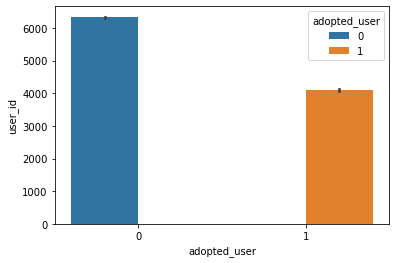

In [45]:
sn.barplot(data=df,x="adopted_user",y="user_id",hue="adopted_user")

In [47]:
df.corr()

,user_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,login_per_day,visited,adopted_user
user_id,1.000000,0.010956,-0.012878,-0.040880,-0.029354,-0.033602,0.001345,NaN,-0.253541
creation_time,0.010956,1.000000,0.001715,0.023538,-0.020794,-0.033133,0.431726,NaN,-0.006412
last_session_creation_time,-0.012878,0.001715,1.000000,-0.004539,-0.008294,0.029462,0.368834,NaN,0.000297
opted_in_to_mailing_list,-0.040880,0.023538,-0.004539,1.000000,0.472487,-0.042151,0.008748,NaN,-0.011417
enabled_for_marketing_drip,-0.029354,-0.020794,-0.008294,0.472487,1.000000,-0.028640,-0.008829,NaN,0.005235
org_id,-0.033602,-0.033133,0.029462,-0.042151,-0.028640,1.000000,-0.002054,NaN,0.063836
login_per_day,0.001345,0.431726,0.368834,0.008748,-0.008829,-0.002054,1.000000,NaN,-0.006608
visited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adopted_user,-0.253541,-0.006412,0.000297,-0.011417,0.005235,0.063836,-0.006608,NaN,1.000000


<AxesSubplot:>

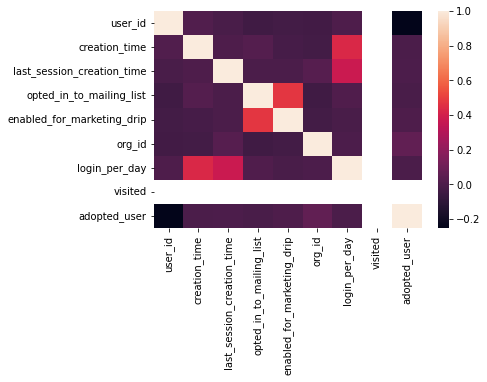

In [49]:
sn.heatmap(df.corr())